In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

### preparing the dataset

In [76]:
dataset = pd.read_csv("boston_house_prices.csv")

In [77]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [78]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [79]:
dataset['price'] = dataset['MEDV']
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,36.2


In [80]:
dataset.drop('MEDV', inplace=True, axis=1)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [81]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [82]:
# check the missing values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [83]:
# correlation
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0, 0.5, 'Price')

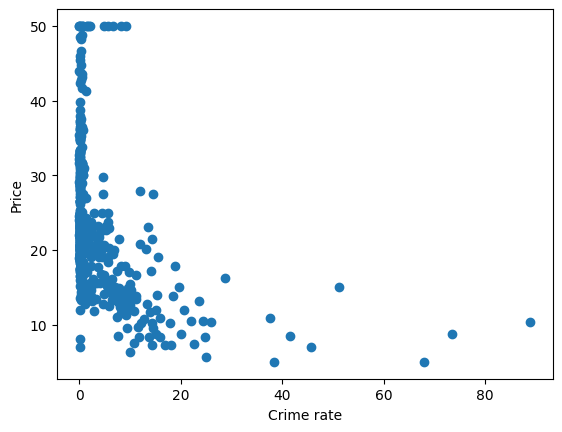

In [84]:
plt.scatter(dataset['CRIM'], dataset['price'])
plt.xlabel('Crime rate')
plt.ylabel("Price")

Crime rate and pricing are inversely correlated

Text(0, 0.5, 'Price')

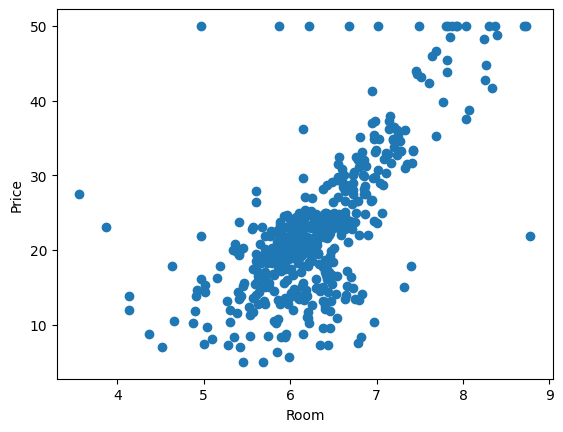

In [85]:
plt.scatter(dataset['RM'], dataset['price'])
plt.xlabel('Room')
plt.ylabel("Price")

<AxesSubplot: xlabel='RM', ylabel='price'>

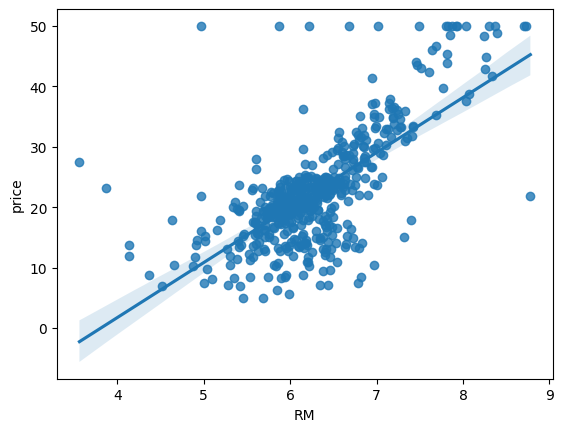

In [86]:
import seaborn as sns
sns.regplot(x='RM', y='price', data=dataset)

as number of rooms increases, the price also increases

### preparing the model

In [87]:
x = dataset.drop('price', axis=1)
y = dataset['price']

In [88]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [89]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [91]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
355,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60
179,0.05780,0.0,2.46,0,0.488,6.980,58.4,2.8290,3,193,17.8,396.90,5.04
402,9.59571,0.0,18.10,0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31
125,0.16902,0.0,25.65,0,0.581,5.986,88.4,1.9929,2,188,19.1,385.02,14.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.13058,0.0,10.01,0,0.547,5.872,73.1,2.4775,6,432,17.8,338.63,15.37
220,0.35809,0.0,6.20,1,0.507,6.951,88.5,2.8617,8,307,17.4,391.70,9.71
126,0.38735,0.0,25.65,0,0.581,5.613,95.6,1.7572,2,188,19.1,359.29,27.26
213,0.14052,0.0,10.59,0,0.489,6.375,32.3,3.9454,4,277,18.6,385.81,9.38


In [92]:
# standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [93]:
x_train = scaler.fit_transform(x_train)

In [94]:
x_test = scaler.transform(x_test)

In [95]:
# save the pickle file for standardization
import pickle
pickle.dump(scaler, open('scaling.pkl', 'wb'))

### Train the model

In [96]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [97]:
model.fit(x_train, y_train)

LinearRegression()

In [98]:
model.coef_

array([-0.70721654,  1.34956605,  0.23909114,  0.96237165, -2.47495643,
        2.65950392, -0.02470781, -3.3440496 ,  2.69210583, -1.87834573,
       -1.93431   ,  0.80202093, -3.93345908])

In [99]:
# on which parameters the model has been trained
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [100]:
model.score(x_test, y_test)

0.7555467639890674

In [101]:
# prediction
pred = model.predict(x_test)
pred

array([ 9.89931445, 35.94753709, 33.02754205, 25.29422431, 39.17754788,
       29.50584235, 30.54811676,  8.30091086, 33.21816197, 25.14686853,
       17.11374658, 27.29026281, 15.7979082 , 23.4619924 , 12.6370639 ,
       29.3872361 , 17.10977652, 13.57680857, 34.40466241, 29.65465802,
       22.17192688, 17.42901611, 11.71550994, 22.16994825, 22.41299238,
       20.08555761,  9.62951643, 17.44994509, 16.50081345, 28.30317737,
       32.80710522, 15.27959595, 20.65956937, 16.45805981, 20.42688621,
       14.14096239, 20.45409594, 13.22319867, 36.52924437, 20.47012847,
       17.04449523, 17.20189546, 24.40162016, 12.86320162, 27.51813508,
       31.05180966, 14.04030575, 17.78742147, 24.08374798, 13.39339575,
       22.61403781, 22.55153806, 13.16060253, 20.13209543, 20.98678704,
       22.24334701,  8.46498609, 16.87906777, 21.75299466, 19.80347267,
       12.5465034 , 13.4312077 , 18.01377992, 17.91505108, 24.31347861,
       19.71824044, 33.34979787, 25.74645092, 36.97596376, 23.49

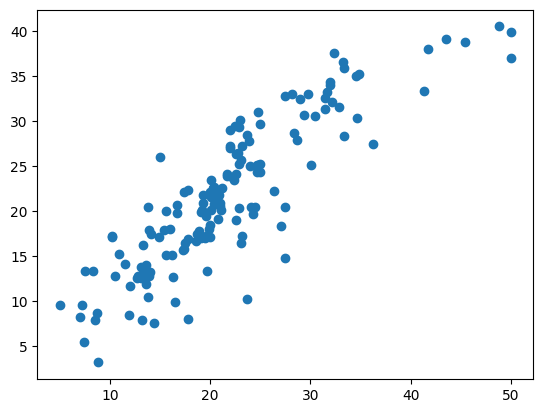

In [102]:
# plot a scatter plot for the prediction

plt.scatter(y_test, pred)

In [103]:
# calculate the residuals
residuals = y_test - pred
residuals

8      6.600686
306   -2.547537
188   -3.227542
165   -0.294224
268    4.322452
         ...   
48     6.774534
217    0.733222
328   -1.634414
284    0.078427
107   -0.438444
Name: price, Length: 152, dtype: float64

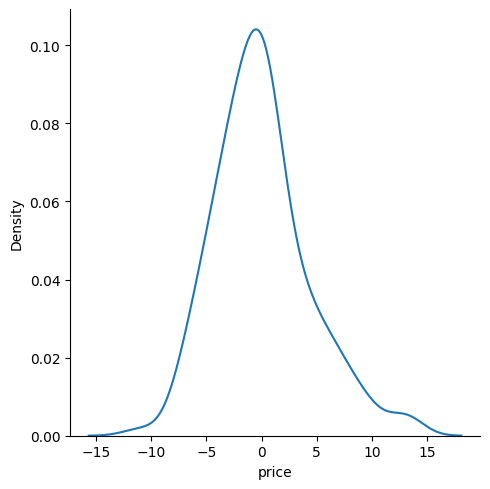

In [104]:
# plot the resuduals

sns.displot(residuals, kind="kde")

In [105]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test, pred))
print(mean_absolute_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred))) # root mean squared error

18.155309489455487
3.203053474949561
4.260904773572801


#### prediction

In [106]:
x.iloc[0]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
Name: 0, dtype: float64

In [107]:
test_input = [0.00632, 18.00000, 2.31000, 0.00000, 0.53800, 6.57500, 65.20000, 4.09000, 1.00000, 296.00000, 15.30000, 396.90000, 4.98000]
test_input = scaler.transform([test_input])
test_input

/home/sachin/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.40425118,  0.31350825, -1.29973075, -0.29306922, -0.15214513,
         0.39308962, -0.10469195,  0.17087254, -0.97716083, -0.65055874,
        -1.44568667,  0.4279362 , -1.05955094]])

In [108]:
model.predict(test_input)

array([29.78723716])

### save the model using pickle

In [109]:
pickle.dump(model, open("model.pkl", "wb"))

In [110]:
saved_model = pickle.load(open('model.pkl', 'rb'))
saved_model.predict(test_input)

array([29.78723716])